## **Intern: Muhammad Osama Ahmed**


## The Sparks Foundation - GRIP


### Data Science & Business Analytics Internship


#### Task 2: Prediction using Unsupervised ML

-   Predict the optimum number of clusters.
-   Represent it visually


#### Import Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")


#### Read Data


In [2]:
# Reading data from remote link
url = "https://bit.ly/3kXTdox"

# df = pd.read_csv(url)
df = pd.read_csv(r'datasets/Iris.csv', index_col=0)
# df = sns.load_dataset('iris')

print("Data imported successfully")

df.head()


Data imported successfully


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


#### Predict the optimum number of clusters.


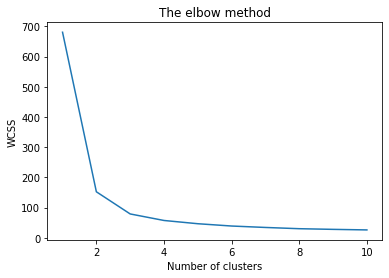

In [3]:
# By using Elbow Method
x = df.iloc[:, [0, 1, 2, 3]].values
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++',
                    max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


**The above graph having an elbow shape and it's called an **"ELBOW METHOD"** and the optimum cluster is where the elbow occurs.
This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration. In this case it is happening at the value of 3. Therefore, our optimum number of cluster is 3.**


#### Visualize


In [4]:
kmeans = KMeans(n_clusters=3, init='k-means++',
                max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)


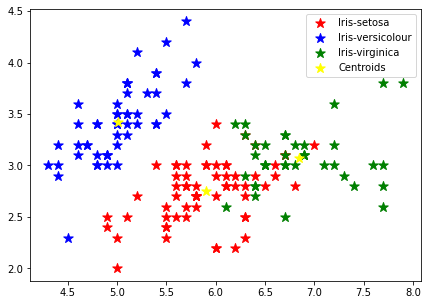

In [5]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(7, 5))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],
            s=100, c='red', label='Iris-setosa', marker="*")
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s=100,
            c='blue', label='Iris-versicolour', marker="*")
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s=100,
            c='green', label='Iris-virginica', marker="*")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[
            :, 1], s=100, c='yellow', label='Centroids', marker="*")
plt.legend()
